## 🧡 모듈 정리

In [16]:
from sklearn.model_selection import train_test_split # 학습 데이터와 테스트 데이터 분리
from sklearn.metrics import mean_squared_error # mse 손실함수 
from sklearn.linear_model import LinearRegression # 회귀 모델
import matplotlib.pyplot as plt #  시각화 모듈
%matplotlib inline 
import seaborn as sns
import pandas as pd # 데이터 프레임 모듈
import numpy as np
import warnings
warnings.filterwarnings( 'ignore' ) # 경고 문구 무시

## 📚 데이터 가져오기

In [17]:
df = pd.read_csv('train.csv')

print(f'전체 컬럼 개수 : {len(df.columns)}')

전체 컬럼 개수 : 12


## 📆 datetime 컬럼을 datetime 자료형으로 변환하고 연, 월, 일, 시, 분, 초까지 6가지 컬럼 생성하기


In [18]:
# 현재 datetime의 자료형 확인 -> str
type(df['datetime'][0])

str

In [19]:
# 데이터 프레임 확인
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [20]:
# 데이터 타입 변경 -> datetime64[ns]
df['datetime'] = pd.to_datetime(df['datetime'])
df['datetime']

0       2011-01-01 00:00:00
1       2011-01-01 01:00:00
2       2011-01-01 02:00:00
3       2011-01-01 03:00:00
4       2011-01-01 04:00:00
                ...        
10881   2012-12-19 19:00:00
10882   2012-12-19 20:00:00
10883   2012-12-19 21:00:00
10884   2012-12-19 22:00:00
10885   2012-12-19 23:00:00
Name: datetime, Length: 10886, dtype: datetime64[ns]

In [21]:
# 연, 월, 일, 시, 분, 초까지 6가지 컬럼 생성
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df['day'] = df['datetime'].dt.day
df['hour'] = df['datetime'].dt.hour
df['minute'] = df['datetime'].dt.minute
df['second'] = df['datetime'].dt.second

print(f'연,월,일,시,분,초 컬럼 확인: {df.columns}')

연,월,일,시,분,초 컬럼 확인: Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'year', 'month', 'day', 'hour', 'minute', 'second'],
      dtype='object')


## 📊 year, month, day, hour, minute, second 데이터 개수 시각화하기

<AxesSubplot:xlabel='second', ylabel='count'>

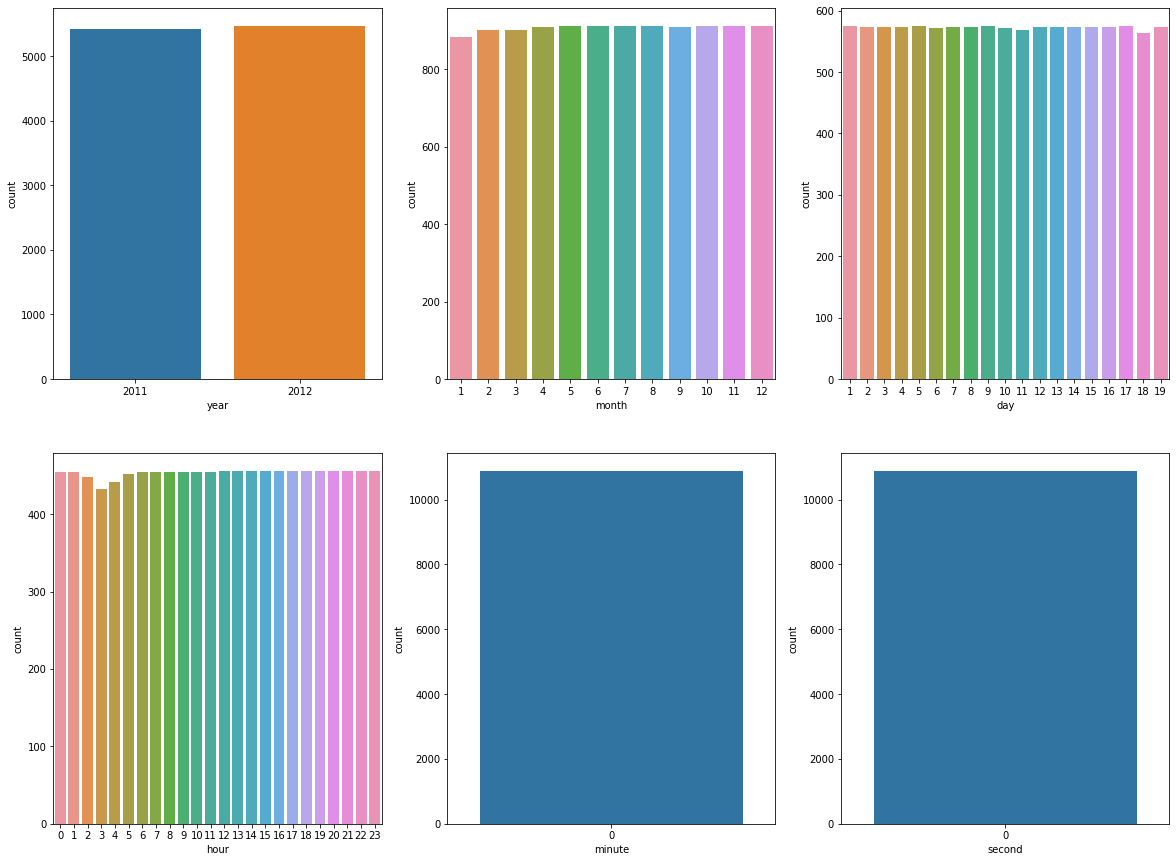

In [22]:
fig, axes = plt.subplots(2, 3,figsize=(20,15))
sns.countplot(df['year'], ax= axes[0,0])
sns.countplot(df['month'], ax= axes[0,1])
sns.countplot(df['day'], ax= axes[0,2])
sns.countplot(df['hour'], ax= axes[1,0])
sns.countplot(df['minute'], ax= axes[1,1])
sns.countplot(df['second'], ax= axes[1,2])

## 🥢 X, y 컬럼 선택 및 train/test 데이터 분리

In [23]:
df.columns # 컬럼 확인

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'year', 'month', 'day', 'hour', 'minute', 'second'],
      dtype='object')

In [24]:
# X,y데이터 분리
X = df[['season', 'holiday', 'workingday', 'weather', 'temp',
         'humidity', 'windspeed','year', 'month', 'day', 'hour']]
y = df['count']

In [25]:
# X데이터 확인
pd.DataFrame(X)

,season,holiday,workingday,weather,temp,humidity,windspeed,year,month,day,hour
0,1,0,0,1,9.84,81,0.0000,2011,1,1,0
1,1,0,0,1,9.02,80,0.0000,2011,1,1,1
2,1,0,0,1,9.02,80,0.0000,2011,1,1,2
3,1,0,0,1,9.84,75,0.0000,2011,1,1,3
4,1,0,0,1,9.84,75,0.0000,2011,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...
10881,4,0,1,1,15.58,50,26.0027,2012,12,19,19
10882,4,0,1,1,14.76,57,15.0013,2012,12,19,20
10883,4,0,1,1,13.94,61,15.0013,2012,12,19,21
10884,4,0,1,1,13.94,61,6.0032,2012,12,19,22


In [26]:
# y데이터 확인
pd.DataFrame(y)

,count
0,16
1,40
2,32
3,13
4,1
...,...
10881,336
10882,241
10883,168
10884,129


In [27]:
# 학습,테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=7)        

## 🧍‍♂️ 모델 학습 (LinearRegression)

In [28]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [29]:
predictions = model.predict(X_test) # 예측값

mse = mean_squared_error(y_test, predictions) # mse 오차

rmse = np.sqrt(mse) # rmse 오차

print(f'예측값 : {predictions}\nmse오차 : {mse}\nrmse오차 : {rmse}')

예측값 : [252.61475885 192.90483465 195.25145674 ... 161.35105848  75.08641229
 182.80277589]
mse오차 : 19618.47503796297
rmse오차 : 140.0659667369735


## 📊 x축은 temp 또는 humidity로, y축은 count로 예측 결과 시각화하기

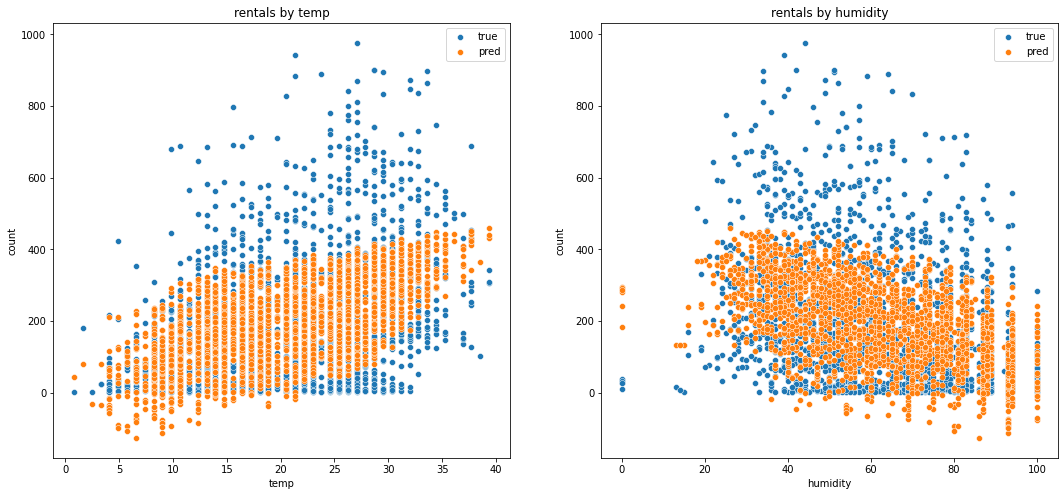

In [30]:
fig,axes = plt.subplots(1,2,figsize = (18,8))

# 온도에 따른 대여량
sns.scatterplot(X_test['temp'], y_test, ax = axes[0])
sns.scatterplot(X_test['temp'],predictions, ax = axes[0])
axes[0].legend(labels=["true", "pred"])
axes[0].set_title("rentals by temp")

# 습도에 따른 대여량
sns.scatterplot(X_test['humidity'], y_test, ax = axes[1])
sns.scatterplot(X_test['humidity'],predictions, ax = axes[1])
axes[1].legend(labels=["true", "pred"])
axes[1].set_title("rentals by humidity")

plt.show()